In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [28]:
model_dir = "../../model_outputs/ics_attack/llm_finetuned_models/"
models = ["pt_gpt2-xl","gpt2-xl/Epoch_5","gpt2-xl/Epoch_10"]
data_dir = "../../datasets/ics_attack/"
result_dir = "../../model_outputs/ics_attack/"


In [14]:


text_embeddings = []
text_hop_embeddings = []
text_matrix = []
text_hop_matrix = []
for model in models:
    text_emb_dir = model_dir+model+"/"
    text_embeddings.append(np.load(text_emb_dir+'text_embeddings.npy'))
    # if(model=="Gpt2"):
    #     our_embeddings.append(np.load(dir_name+model+"/data/our_embeddings_update3.npy"))
    # else:
    text_hop_embeddings.append(np.load(text_emb_dir+'text_hop_embeddings.npy'))
    text_matrix.append(cosine_similarity(text_embeddings[-1]))
    text_hop_matrix.append(cosine_similarity(text_hop_embeddings[-1]))

In [15]:
# # Experimental
# model = "Gpt2"
# text_embeddings.append(np.load(dir_name+model+"/data/all_embeddings.npy"))
# our_embeddings.append(np.load(dir_name+model+"/data/our_embeddings_bl3.npy"))
# text_matrix.append(cosine_similarity(text_embeddings[-1]))
# our_emb_matrix.append(cosine_similarity(our_embeddings[-1]))
# models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]

In [16]:
# Graph calculation

In [17]:
weakness_hop_sim_matrix = np.load(data_dir+'weakness_hop_sim_matrix.npy')
attack_hop_sim_matrix = np.load(data_dir+'attack_hop_sim_matrix.npy')

In [18]:
attack_size = attack_hop_sim_matrix.shape[0]

In [19]:
weak_size=weakness_hop_sim_matrix.shape[0]

In [20]:
from scipy.stats import spearmanr
# Flatten the matrices
def get_spearman_rank_corr_graph(matrix1,matrix2, isAttack):
    cosine_matrix1 = matrix1
    if(isAttack):
        cosine_matrix2 = matrix2[:attack_size,:attack_size]
    else:
        cosine_matrix2 = matrix2[attack_size:,attack_size:]
    # print(cosine_matrix1.shape)
    # print(cosine_matrix2.shape)
    flat_cosine_sim_matrix1 = cosine_matrix1.flatten()
    flat_cosine_sim_matrix2 = cosine_matrix2.flatten()
    
    # Compute ranks for both arrays
    ranks1 = np.argsort(np.argsort(flat_cosine_sim_matrix1))
    ranks2 = np.argsort(np.argsort(flat_cosine_sim_matrix2))
    
    # Compute Spearman's rank correlation
    spearman_corr, _ = spearmanr(ranks1, ranks2)
    print(f"Spearman's rank correlation: {spearman_corr}")

In [21]:
for i,model in enumerate(models):
    print("Model: ", model)
    get_spearman_rank_corr_graph(attack_hop_sim_matrix,text_hop_matrix[i], True)


Model:  pt_gpt2-xl
Spearman's rank correlation: 0.4022420120983041
Model:  gpt2-xl/Epoch_5
Spearman's rank correlation: 0.4380451339323483
Model:  gpt2-xl/Epoch_10
Spearman's rank correlation: 0.4590812300134629


In [22]:
# Model:  pretrained_SecBert
# Spearman's rank correlation: 0.44955111817220017
# Model:  SecBert_E5
# Spearman's rank correlation: 0.4186223472138092
# Model:  pretrained_SecureBert
# Spearman's rank correlation: 0.3974698791358375
# Model:  SecureBert_E5
# Spearman's rank correlation: 0.42562237081674514
# Model:  pretrained_Gpt2
# Spearman's rank correlation: 0.38609064674090493
# Model:  Gpt2_E5
# Spearman's rank correlation: 0.4104655634939866
# Model:  Gpt2
# Spearman's rank correlation: 0.44587326251883025

# Model:  pretrained_SecBert
# Spearman's rank correlation: 0.44955111817220017
# Model:  SecBert_E10
# Spearman's rank correlation: 0.42609621901315214
# Model:  pretrained_SecureBert
# Spearman's rank correlation: 0.3974698791358375
# Model:  SecureBert_E10
# Spearman's rank correlation: 0.45093378599496986
# Model:  pretrained_Gpt2
# Spearman's rank correlation: 0.38609064674090493
# Model:  Gpt2_E10
# Spearman's rank correlation: 0.4422736606293931

In [23]:
for i,model in enumerate(models):
    print("Model: ", model)
    get_spearman_rank_corr_graph(weakness_hop_sim_matrix,text_hop_matrix[i], False)

Model:  pt_gpt2-xl
Spearman's rank correlation: 0.6182706447948573
Model:  gpt2-xl/Epoch_5
Spearman's rank correlation: 0.639543300793981
Model:  gpt2-xl/Epoch_10
Spearman's rank correlation: 0.662769171011785


In [14]:
# Model:  pretrained_SecBert
# Spearman's rank correlation: 0.6800343061460163
# Model:  SecBert_E5
# Spearman's rank correlation: 0.6379095749883417
# Model:  pretrained_SecureBert
# Spearman's rank correlation: 0.7017233367011555
# Model:  SecureBert_E5
# Spearman's rank correlation: 0.6778359900838812
# Model:  pretrained_Gpt2
# Spearman's rank correlation: 0.6205980666920503
# Model:  Gpt2_E5
# Spearman's rank correlation: 0.6390517336018519
# Model:  Gpt2
# Spearman's rank correlation: 0.6536447711047804

# Model:  pretrained_SecBert
# Spearman's rank correlation: 0.6800343061460163
# Model:  SecBert_E10
# Spearman's rank correlation: 0.6395035631415715
# Model:  pretrained_SecureBert
# Spearman's rank correlation: 0.7017233367011555
# Model:  SecureBert_E10
# Spearman's rank correlation: 0.7230847538374513
# Model:  pretrained_Gpt2
# Spearman's rank correlation: 0.6205980666920503
# Model:  Gpt2_E10
# Spearman's rank correlation: 0.6560001946935845

In [24]:
for i,model in enumerate(models):
    print("Model: ", model)
    get_spearman_rank_corr_graph(attack_hop_sim_matrix,text_matrix[i], True)

Model:  pt_gpt2-xl
Spearman's rank correlation: 0.19357704322490424
Model:  gpt2-xl/Epoch_5
Spearman's rank correlation: 0.20107134644905203
Model:  gpt2-xl/Epoch_10
Spearman's rank correlation: 0.20814491820774214


In [ ]:
# Model:  pretrained_SecBert
# Spearman's rank correlation: 0.18759795664240614
# Model:  SecBert_E10
# Spearman's rank correlation: 0.2077961900985789
# Model:  pretrained_SecureBert
# Spearman's rank correlation: 0.1761827387754141
# Model:  SecureBert_E10
# Spearman's rank correlation: 0.18818306835353632
# Model:  pretrained_Gpt2
# Spearman's rank correlation: 0.19349854656548124
# Model:  Gpt2
# Spearman's rank correlation: 0.16683144293174368

In [25]:
for i,model in enumerate(models):
    print("Model: ", model)
    get_spearman_rank_corr_graph(weakness_hop_sim_matrix,text_matrix[i], False)

Model:  pt_gpt2-xl
Spearman's rank correlation: 0.1498346353266428
Model:  gpt2-xl/Epoch_5
Spearman's rank correlation: 0.18245876445936
Model:  gpt2-xl/Epoch_10
Spearman's rank correlation: 0.18902558304245293


In [ ]:
# Model:  pretrained_SecBert
# Spearman's rank correlation: 0.0912164455896454
# Model:  SecBert_E10
# Spearman's rank correlation: 0.16440927833400593
# Model:  pretrained_SecureBert
# Spearman's rank correlation: 0.08490836527819691
# Model:  SecureBert_E10
# Spearman's rank correlation: 0.10187055698423265
# Model:  pretrained_Gpt2
# Spearman's rank correlation: 0.15141390303196114
# Model:  Gpt2
# Spearman's rank correlation: 0.15320484403659582

In [343]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hit_k_graph(matrix1,matrix2, matrix3, isAttack):
    
    # Initialize a dictionary to store average hit@k for each k
    
    plt.figure(figsize=(5, 5))
    # Loop over all the models
    models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
    #models = ["Gpt2"]
    markers = ['o', 's', '^', 'v', '<', '>']
    if(isAttack):
        size = 203
    else:
        size = 933
    all_hits = []
    for j in range(1,len(models),2):
        # Define the cosine similarity matrices
        model = models[j]
        cosine_matrix1 = matrix1
        if(isAttack):
            cosine_matrix2 = matrix2[j][:203,:203]
            cosine_matrix3 = matrix3[j][:203,:203]
        else:
            cosine_matrix2 = matrix2[j][203:,203:]
            cosine_matrix3 = matrix3[j][203:,203:]
        # Loop over each k from 10 to 1136
        average_hit_at_k1 = {}
        average_hit_at_k2 = {}
        for k in range(10, size,int(size/10)):
            hit_at_k1 = []
            hit_at_k2 = []
            # Loop over each row
            for i in range(size):
                # Get the indices of the top k values in the row for both matrices
                top_k_indices_1 = np.argsort(cosine_matrix1[i])[-k:]
                top_k_indices_2 = np.argsort(cosine_matrix2[i])[-k:]
                top_k_indices_3 = np.argsort(cosine_matrix3[i])[-k:]
                
                # Calculate the hit@k (number of common indices in top k)
                hit_count1 = len(set(top_k_indices_1) & set(top_k_indices_2))
                hit_count2 = len(set(top_k_indices_1) & set(top_k_indices_3))
                # print(set(top_k_indices_1))
                # print(set(top_k_indices_2))
                
                # Append the result to the list
                hit_at_k1.append(hit_count1)
                hit_at_k2.append(hit_count2)
                # print(hit_count)
            # Calculate the average hit@k for the current k
            average_hit_at_k1[k] = np.mean(hit_at_k1)
            average_hit_at_k2[k] = np.mean(hit_at_k2)
        
        # Plot the results
        ks = list(average_hit_at_k1.keys())
        hits1 = list(average_hit_at_k1.values())
        hits2 = list(average_hit_at_k2.values())

        plt.plot(ks, hits1, label=model+" our emb", marker=markers[j])
        plt.plot(ks, hits2, label=model+" text emb", marker=markers[j])
    plt.xlabel('k')
    plt.ylabel('Average Hit@k')
    plt.xticks(ks)
    plt.grid(True)
    plt.legend()
    plt.title('Average Hit@k for Different Values of k')
    plt.show()
    if(isAttack):
        plt.savefig(dir_name+"plots/text_hit@k_with_attack_graph.png", dpi=300, bbox_inches='tight')
    else:
        plt.savefig(dir_name+"plots/text_hit@k_with_weakness_graph.png", dpi=300, bbox_inches='tight')
# # Print the results
# for k in ks:
#     print(f"Average Hit@{k}: {average_hit_at_k[k]}")

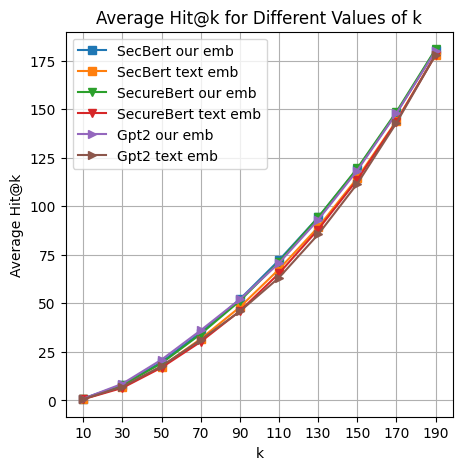

<Figure size 640x480 with 0 Axes>

In [344]:
plot_hit_k_graph(attack_hop_sim_matrix,our_emb_matrix, text_matrix, True)

In [39]:
import matplotlib.pyplot as plt

def dcg(relevance_scores):
    """ Calculate Discounted Cumulative Gain (DCG) """
    return np.sum((2 ** relevance_scores - 1) / np.log2(np.arange(1, len(relevance_scores) + 1) + 1))

def ndcg_at_k(row1, row2, k):
    """ Calculate Normalized Discounted Cumulative Gain (NDCG) at k """
    relevance_scores = row1[np.argsort(row2)[-k:]]
    ideal_relevance_scores = np.sort(row1)[-k:][::-1]
    return dcg(relevance_scores) / dcg(ideal_relevance_scores)

def NDCG_calculation_graph(matrix1,matrix2,matrix3, isAttack):
    plt.figure(figsize=(5, 3))
    # Loop over all the models
    
    models = ["P. Gpt2" ,  "F. Gpt2 E5", "F. Gpt2 E10"]
    markers = ['s', '>', 'o', '^', '.', 'x']
    model_pos = [0,1,2]
    for j in model_pos:
        # Define the cosine similarity matrices
        model = models[j]
        cosine_matrix1 = matrix1
        size = 1136
        if(isAttack):
            cosine_matrix2 = matrix2[j][:attack_size,:attack_size]
            cosine_matrix3 = matrix3[j][:attack_size,:attack_size]
            size = attack_size
        else:
            cosine_matrix2 = matrix2[j][attack_size:,attack_size:]
            cosine_matrix3 = matrix3[j][attack_size:,attack_size:]
            size = weak_size
        average_NDCG_at_k1 = {}
        average_NDCG_at_k2 = {}
        for k in range(10, size,int(size/10)):
            # Calculate NDCG for each row
            #k = 5  # Set k to the number of elements since we want NDCG for the whole row
            ndcg_scores1 = []
            ndcg_scores2 = []
            for i in range(size):
                ndcg_score1 = ndcg_at_k(cosine_matrix1[i], cosine_matrix2[i], k)
                ndcg_scores1.append(ndcg_score1)
                ndcg_score2 = ndcg_at_k(cosine_matrix1[i], cosine_matrix3[i], k)
                ndcg_scores2.append(ndcg_score2)
            #print("K ", k)
            # Print NDCG scores for each row
            #print(f"NDCG scores for each row: {ndcg_scores}")
            #print(f"Average NDCG: {np.mean(ndcg_scores)}")
            # Calculate the average hit@k for the current k
            average_NDCG_at_k1[k] = np.mean(ndcg_scores1)
            average_NDCG_at_k2[k] = np.mean(ndcg_scores2)
        # Plot the results
        ks = list(average_NDCG_at_k1.keys())
        hits1 = list(average_NDCG_at_k1.values())
        hits2 = list(average_NDCG_at_k2.values())
        plt.plot(ks, hits1, label="AWEB "+model,color='tab:green', marker=markers[j],linewidth=0.7)
        plt.plot(ks, hits2, label="Text Embd. "+model,color='tab:blue', marker=markers[j],linewidth=0.7)
        plt.xlabel('k',fontsize=12)
        plt.ylabel('Average NDCG@k', fontsize=12)
        plt.xticks(ks,fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True)
    plt.legend(fontsize=11)
    #plt.title('Average NDCG@k for Different Values of k')
    
    if(isAttack):
        plt.savefig(result_dir+"plots/our_text_NDCG@k_with_attack_2.pdf", dpi=300, bbox_inches='tight')
    else:
        plt.savefig(result_dir+"plots/our_text_NDCG@k_with_weakness_2.pdf", dpi=300, bbox_inches='tight')
    plt.show()

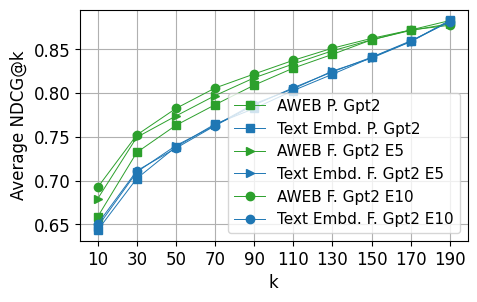

In [40]:
NDCG_calculation_graph(attack_hop_sim_matrix,text_hop_matrix,text_matrix, True)


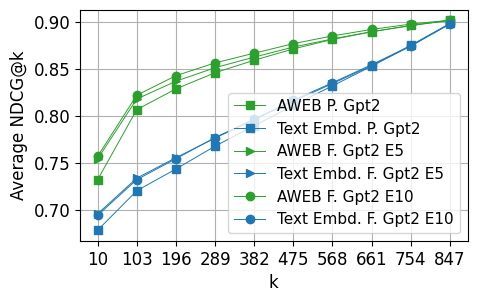

In [41]:
NDCG_calculation_graph(weakness_hop_sim_matrix,text_hop_matrix,text_matrix, False)


In [322]:
import matplotlib.pyplot as plt

def dcg(relevance_scores):
    """ Calculate Discounted Cumulative Gain (DCG) """
    return np.sum((2 ** relevance_scores - 1) / np.log2(np.arange(1, len(relevance_scores) + 1) + 1))

def ndcg_at_k(row1, row2, k):
    """ Calculate Normalized Discounted Cumulative Gain (NDCG) at k """
    relevance_scores = row1[np.argsort(row2)[-k:]]
    ideal_relevance_scores = np.sort(row1)[-k:][::-1]
    return dcg(relevance_scores) / dcg(ideal_relevance_scores)

def NDCG_calculation_graph(matrix1,matrix2, isAttack):
    plt.figure(figsize=(5, 3))
    # Loop over all the models
    
    models = ["PT SecBert", "FT SecBert", "PT SecureBert",  "FT SecureBert", "PT Gpt2" ,  "FT Gpt2"]
    markers = ['o', 's', '^', 'v', '<', '>']
    for j,model in enumerate(models):
        # Define the cosine similarity matrices
        cosine_matrix1 = matrix1
        size = 1136
        if(isAttack):
            cosine_matrix2 = matrix2[j][:203,:203]
            size = 203
        else:
            cosine_matrix2 = matrix2[j][203:,203:]
            size = 933
        average_NDCG_at_k = {}
        for k in range(10, size,int(size/10)):
            # Calculate NDCG for each row
            #k = 5  # Set k to the number of elements since we want NDCG for the whole row
            ndcg_scores = []
            
            for i in range(size):
                ndcg_score = ndcg_at_k(cosine_matrix1[i], cosine_matrix2[i], k)
                ndcg_scores.append(ndcg_score)
            #print("K ", k)
            # Print NDCG scores for each row
            #print(f"NDCG scores for each row: {ndcg_scores}")
            #print(f"Average NDCG: {np.mean(ndcg_scores)}")
            # Calculate the average hit@k for the current k
            average_NDCG_at_k[k] = np.mean(ndcg_scores)
        # Plot the results
        ks = list(average_NDCG_at_k.keys())
        hits = list(average_NDCG_at_k.values())
        plt.plot(ks, hits, label=model, marker=markers[j])
        plt.xlabel('k')
        plt.ylabel('Average NDCG@k')
        plt.xticks(ks)
        plt.grid(True)
    plt.legend()
    #plt.title('Average NDCG@k for Different Values of k')
    
    if(isAttack):
        plt.savefig(dir_name+"plots/text_NDCG@k_with_attack.pdf", dpi=300, bbox_inches='tight')
    else:
        plt.savefig(dir_name+"plots/text_NDCG@k_with_weakness.pdf", dpi=300, bbox_inches='tight')
    plt.show()

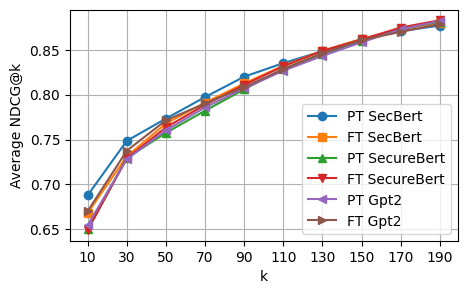

In [319]:
NDCG_calculation_graph(attack_hop_sim_matrix,our_emb_matrix, True)


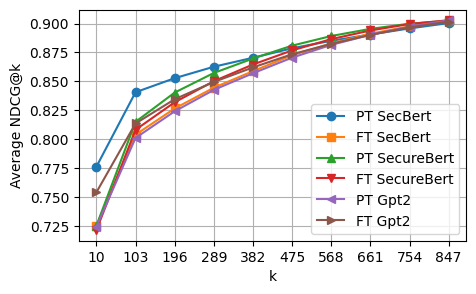

In [320]:
NDCG_calculation_graph(weakness_hop_sim_matrix,our_emb_matrix, False)

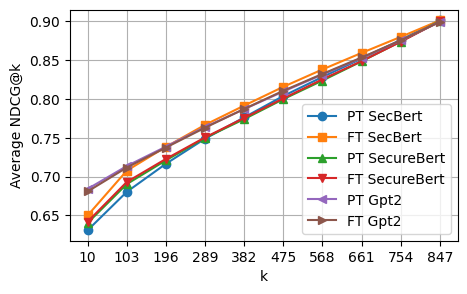

In [323]:
NDCG_calculation_graph(weakness_hop_sim_matrix,text_matrix, False)

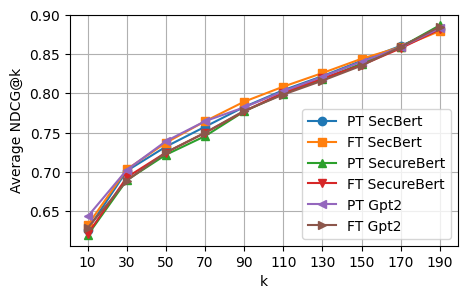

In [324]:
NDCG_calculation_graph(attack_hop_sim_matrix,text_matrix, True)

In [406]:
from scipy.stats import spearmanr
# Flatten the matrices
def get_spearman_rank_corr(matrix1,matrix2):
    flat_cosine_sim_matrix1 = matrix1.flatten()
    flat_cosine_sim_matrix2 = matrix2.flatten()
    
    # Compute ranks for both arrays
    ranks1 = np.argsort(np.argsort(flat_cosine_sim_matrix1))
    ranks2 = np.argsort(np.argsort(flat_cosine_sim_matrix2))
    
    # Compute Spearman's rank correlation
    spearman_corr, _ = spearmanr(ranks1, ranks2)
    print(f"Spearman's rank correlation: {spearman_corr}")

In [407]:
# models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
for i,model in enumerate(models):
    print("Model: ", model)
    get_spearman_rank_corr(text_matrix[i],our_emb_matrix[i])

Model:  pretrained_SecBert
Spearman's rank correlation: 0.527928137278382
Model:  SecBert_E10
Spearman's rank correlation: 0.6767794423495401
Model:  pretrained_SecureBert
Spearman's rank correlation: 0.37746666982523114
Model:  SecureBert_E10
Spearman's rank correlation: 0.44633340063037485
Model:  pretrained_Gpt2
Spearman's rank correlation: 0.6303644211958075
Model:  Gpt2_E10
Spearman's rank correlation: 0.6041440048679109


In [142]:
# Epoch 5
# Model:  pretrained_SecBert
# Spearman's rank correlation: 0.527928137278382
# Model:  SecBert_E5
# Spearman's rank correlation: 0.6653937118862393
# Model:  pretrained_SecureBert
# Spearman's rank correlation: 0.37746666982523114
# Model:  SecureBert_E5
# Spearman's rank correlation: 0.4116167301709388
# Model:  pretrained_Gpt2
# Spearman's rank correlation: 0.6303644211958075
# Model:  Gpt2_E5
# Spearman's rank correlation: 0.5476211992001396



In [108]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hit_k(matrix1,matrix2, title):

    # Initialize a dictionary to store average hit@k for each k
    
    plt.figure(figsize=(5, 3))
    # Loop over all the models
    models = ["PT SecBert", "FT SecBert", "PT SecureBert",  "FT SecureBert", "PT Gpt2" ,  "FT Gpt2"]
    markers = ['o', 's', '^', 'v', '<', '>']
    for j,model in enumerate(models):
        # Define the cosine similarity matrices
        cosine_matrix1 = matrix1[j]
        cosine_matrix2 = matrix2[j]
        average_hit_at_k = {}
        # Loop over each k from 10 to 1136
        for k in range(10, 1136,100):
            hit_at_k = []
        
            # Loop over each row
            for i in range(1136):
                # Get the indices of the top k values in the row for both matrices
                top_k_indices_1 = np.argsort(cosine_matrix1[i])[-k:]
                top_k_indices_2 = np.argsort(cosine_matrix2[i])[-k:]
                
                # Calculate the hit@k (number of common indices in top k)
                hit_count = len(set(top_k_indices_1) & set(top_k_indices_2))
                
                # Append the result to the list
                hit_at_k.append(hit_count)
            
            # Calculate the average hit@k for the current k
            average_hit_at_k[k] = np.mean(hit_at_k)
        
        # Plot the results
        ks = list(average_hit_at_k.keys())
        hits = list(average_hit_at_k.values())
        
        
        plt.plot(ks, hits, label=model, marker=markers[j])
        plt.xlabel('k')
        plt.ylabel('Average Hit@k')
        plt.xticks(ks)
        plt.grid(True)
    plt.legend()
    plt.title('Average Hit@k for Different Values of k')
    plt.show()
    plt.savefig(dir_name+"plots/hit@k_with_text.png", dpi=300, bbox_inches='tight')

# # Print the results
# for k in ks:
#     print(f"Average Hit@{k}: {average_hit_at_k[k]}")

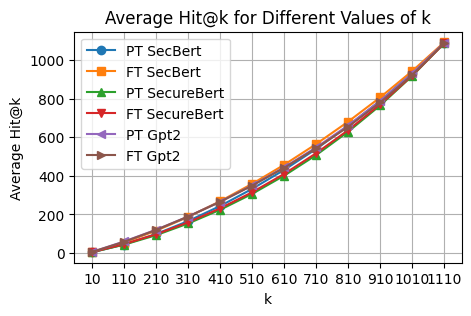

<Figure size 640x480 with 0 Axes>

In [109]:
plot_hit_k(text_matrix,our_emb_matrix, "title")

In [110]:
def dcg(relevance_scores):
    """ Calculate Discounted Cumulative Gain (DCG) """
    return np.sum((2 ** relevance_scores - 1) / np.log2(np.arange(1, len(relevance_scores) + 1) + 1))

def ndcg_at_k(row1, row2, k):
    """ Calculate Normalized Discounted Cumulative Gain (NDCG) at k """
    relevance_scores = row1[np.argsort(row2)[-k:]]
    ideal_relevance_scores = np.sort(row1)[-k:][::-1]
    return dcg(relevance_scores) / dcg(ideal_relevance_scores)

def NDCG_calculation(matrix1,matrix2):
    plt.figure(figsize=(5, 3))
    # Loop over all the models
    models = ["PT SecBert", "FT SecBert", "PT SecureBert",  "FT SecureBert", "PT Gpt2" ,  "FT Gpt2"]
    markers = ['o', 's', '^', 'v', '<', '>']
    for j,model in enumerate(models):
        # Define the cosine similarity matrices
        cosine_matrix1 = matrix1[j]
        cosine_matrix2 = matrix2[j]
        average_NDCG_at_k = {}
        for k in range(10, 1136,100):
            # Calculate NDCG for each row
            #k = 5  # Set k to the number of elements since we want NDCG for the whole row
            ndcg_scores = []
            
            for i in range(1136):
                ndcg_score = ndcg_at_k(cosine_matrix1[i], cosine_matrix2[i], k)
                ndcg_scores.append(ndcg_score)
            #print("K ", k)
            # Print NDCG scores for each row
            #print(f"NDCG scores for each row: {ndcg_scores}")
            #print(f"Average NDCG: {np.mean(ndcg_scores)}")
            # Calculate the average hit@k for the current k
            average_NDCG_at_k[k] = np.mean(ndcg_scores)
        # Plot the results
        ks = list(average_NDCG_at_k.keys())
        hits = list(average_NDCG_at_k.values())
        plt.plot(ks, hits, label=model, marker=markers[j])
        plt.xlabel('k')
        plt.ylabel('Average NDCG@k')
        plt.xticks(ks)
        plt.grid(True)
    plt.legend()
    plt.title('Average NDCG@k for Different Values of k')
    plt.show()
    plt.savefig(dir_name+"plots/NDCG@k_with_text.png", dpi=300, bbox_inches='tight')

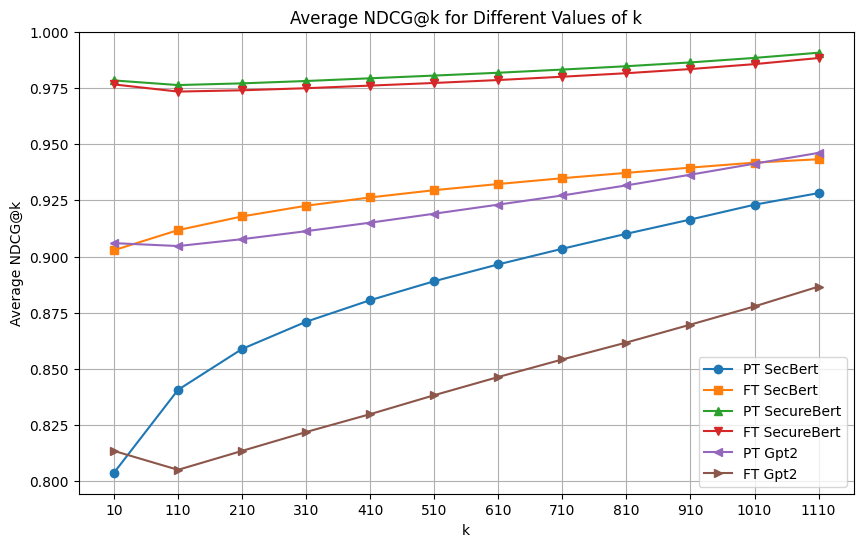

<Figure size 640x480 with 0 Axes>

In [111]:
NDCG_calculation(text_matrix,our_emb_matrix)

In [ ]:
# Graph Calculation

In [328]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hit_k_graph(matrix1,matrix2, isAttack):
    
    # Initialize a dictionary to store average hit@k for each k
    
    plt.figure(figsize=(5, 3))
    # Loop over all the models
    models = ["Gpt2", "pretrained_Gpt2", "SecBert", "pretrained_SecBert", "SecureBert", "pretrained_SecureBert"]
    #models = ["Gpt2"]
    markers = ['o', 's', '^', 'v', '<', '>']
    if(isAttack):
        size = 203
    else:
        size = 933
    for j,model in enumerate(models):
        # Define the cosine similarity matrices
        cosine_matrix1 = matrix1
        if(isAttack):
            cosine_matrix2 = matrix2[j][:203,:203]
        else:
            cosine_matrix2 = matrix2[j][203:,203:]
        # Loop over each k from 10 to 1136
        average_hit_at_k = {}
        for k in range(10, size,int(size/20)):
            hit_at_k = []
        
            # Loop over each row
            for i in range(size):
                # Get the indices of the top k values in the row for both matrices
                top_k_indices_1 = np.argsort(cosine_matrix1[i])[-k:]
                top_k_indices_2 = np.argsort(cosine_matrix2[i])[-k:]
                
                # Calculate the hit@k (number of common indices in top k)
                hit_count = len(set(top_k_indices_1) & set(top_k_indices_2))
                # print(set(top_k_indices_1))
                # print(set(top_k_indices_2))
                
                # Append the result to the list
                hit_at_k.append(hit_count)
                # print(hit_count)
            # Calculate the average hit@k for the current k
            average_hit_at_k[k] = np.mean(hit_at_k)
        
        # Plot the results
        ks = list(average_hit_at_k.keys())
        hits = list(average_hit_at_k.values())
        
        
        plt.plot(ks, hits, label=model, marker=markers[j])
        plt.xlabel('k')
        plt.ylabel('Average Hit@k')
        plt.xticks(ks)
        plt.grid(True)
    plt.legend()
    plt.title('Average Hit@k for Different Values of k')
    plt.show()
    if(isAttack):
        plt.savefig(dir_name+"plots/text_hit@k_with_attack_graph.png", dpi=300, bbox_inches='tight')
    else:
        plt.savefig(dir_name+"plots/text_hit@k_with_weakness_graph.png", dpi=300, bbox_inches='tight')
# # Print the results
# for k in ks:
#     print(f"Average Hit@{k}: {average_hit_at_k[k]}")

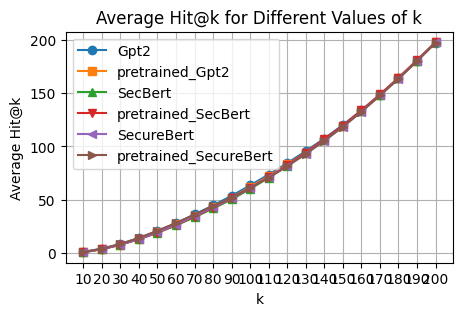

<Figure size 640x480 with 0 Axes>

In [326]:
plot_hit_k_graph(attack_hop_sim_matrix,our_emb_matrix, True)

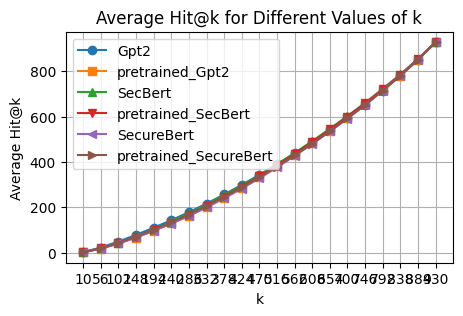

<Figure size 640x480 with 0 Axes>

In [327]:
plot_hit_k_graph(weakness_hop_sim_matrix,our_emb_matrix, False)

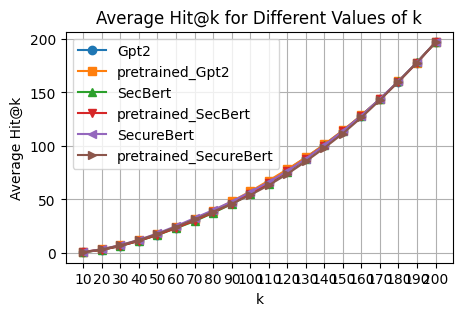

<Figure size 640x480 with 0 Axes>

In [329]:
plot_hit_k_graph(attack_hop_sim_matrix,text_matrix, True)

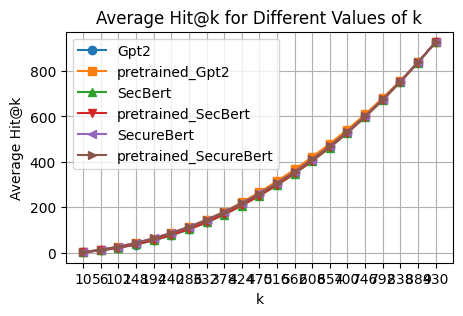

<Figure size 640x480 with 0 Axes>

In [330]:
plot_hit_k_graph(weakness_hop_sim_matrix,text_matrix, False)